# Short Circuit 2: Season 1 Election Notes

>**FORBIDDEN KNOWLEDGE WARNING**
>
>This document contains some information that is not currently present on the main site and may be considered spoilers.
>Continue at your own discretion. Some information in this document cannot be shared on the Discord without spoiler tags.

Election analysis notebooks forked from Edgarware of the Pies, who has been doing this for ages. Thanks to him for a bunch of help getting this all set up. If you're curious, his are at https://edgarware.github.io/blaseball_notebooks/.

This version contains somewhat more opinionated analysis than its predecessors, to let it be my full election analysis all in one place. Trying stuff out.

**Current stats are at the end**, in the form of screenshots from Bricks, the nice box-scores-and-statistics tool iliana wrote. A link to our team's stats is down there too.

In [26]:
import pandas
%matplotlib inline
from blaseball_mike.models import *
from blaseball_mike.tables import StatType
import plotly.express as plot
import plotly.io as _pio
import plotly.subplots as subplot
from IPython.display import display, Markdown
from copy import deepcopy

import os
import sys
pdir = os.path.abspath(os.path.join(os.path.dirname(''), os.path.pardir))
sys.path.append(pdir)
from display import *
from blessings import *
sys.path.remove(pdir)

_pio.renderers.default = "notebook_connected"

crabs = Team.load_by_name("Baltimore Crabs")

sim = SimulationData.load()
display(Markdown(f"**Last Updated Season {sim.season}, Day {sim.day}**"))

**Last Updated Season 1, Day 54**

---
## Amplifications

Amplification are chosen by majority votes for each team. **Each team will receive `1` amplification.**

### Muscle Warmers

**Your Team's Lineup will receive a Small Batting Boost.**

In [30]:
{"sourceLocation":[0],"playerSelection":-1,"sprinkleTarget":0,"sprinkleAmount":300}

{'sourceLocation': [0],
 'playerSelection': -1,
 'sprinkleTarget': 0,
 'sprinkleAmount': 300}

300 boosts of 0.01 each, randomly assigned to hitting attributes of the lineup. 7 hitting attributes can be affected (doesn't touch buoyancy), across 9 players, for an average improvement of 0.0476 per attribute.

### Hand Warmers

**Your Team's Rotation will receive a Small Pitching Boost.**

In [34]:
{"sourceLocation":[1],"playerSelection":-1,"sprinkleTarget":1,"sprinkleAmount":200}

{'sourceLocation': [1],
 'playerSelection': -1,
 'sprinkleTarget': 1,
 'sprinkleAmount': 200}

200 boosts of 0.01 each, randomly assigned to pitching attributes of the rotation. 6 pitching attributes can be affected (affected suppression last time for some reason), across 5 players, for an average improvement of 0.0667 per attribute.

### Foot Warmers

**Your Team's Lineup will receive a Large Baserunning Boost.**

In [35]:
{"sourceLocation":[0],"playerSelection":-1,"sprinkleTarget":3,"sprinkleAmount":500}

{'sourceLocation': [0],
 'playerSelection': -1,
 'sprinkleTarget': 3,
 'sprinkleAmount': 500}

500 boosts of 0.01 each, randomly assigned to baserunning attributes of the lineup. 5 baserunning attributes can be affected, across 9 players, for an average improvement of 0.1111 per attribute.

### Eye Warmers

**Your Team's Lineup will receive a Large Defense Boost.**

In [36]:
{"sourceLocation":[0],"playerSelection":-1,"sprinkleTarget":2,"sprinkleAmount":500}

{'sourceLocation': [0],
 'playerSelection': -1,
 'sprinkleTarget': 2,
 'sprinkleAmount': 500}

500 boosts of 0.01 each, randomly assigned to defense attributes of the lineup. 5 defense attributes can be affected, across 9 players, for an average improvement of 0.1111 per attribute.

### Amplification Analysis:

Since we're bad this season, and this is not going to get us into the playoffs, then it probably makes the most sense to go for the one that would most benefit the player we want to static. If this is Monique, which seems likely, then this would mean the hitting boost, or maybe the baserunning boost. The baserunning boost looks larger on paper but I strongly doubt it would be better to go for in this case; hitting is just *so* much more impactful. If we want to static Callum, then we'd want the pitching boost.

---

## Distortions

Distortions are selected by raffle across all teams. Each distortion will be awarded to one random team, where teams with
more votes are more likely to be selected. **Teams may only receive at most 1 distortion.**

### TASTE THE INFINITE

**Remake your Team in the Shelled One's image.**

##### Analysis:
No indication of mechanical benefits, but sure to make the winning team <span style="color:red">VERY PEANUT-LIKE</span>. Do you really want to bear the image of the one who cursed us in ages past? Have you so quickly forgotten?

Strike, flinching, 0-1.

Strike, flinching, 0-1.

Strike, flinching, 0-1.

Strike, flinching, 0-1.

Strike, flinching, 0-1.

### Fist of the Ape God

**Bestow the Fist of the Ape God unto a random Player in your Team's Rotation.**

In [37]:
{'sourceLocation': [1], 'playerSelection': 0, 'item': 'caves_of_qud_item'}

{'sourceLocation': [1], 'playerSelection': 0, 'item': 'caves_of_qud_item'}

![Oboroqoru_ape_god.png](https://wiki.cavesofqud.com/images/e/e8/Oboroqoru_ape_god.png)

**[Oboroqoru, Ape God](https://wiki.cavesofqud.com/wiki/Oboroqoru,_Ape_God)**

```
You stand not at the foot of a wintry knoll but beneath a mountain of muscle, swathed in blanched fur, that must be nature's crowning jewel. Cast from the mold of the great apes (or perhaps the exemplar from which those apes were molded), the living god differs only in that He bears not two but six arms, each of which might be the fleeced bole of an ancient yew. His fists are of proportions that suggest the might with which hoary gods beat the mountains into shape when the earth was young. However, His aspect bears not a shred of that divine fury; He doesn't rage but instead sits in contemplation of eons.
```

![Fist_of_the_ape_god.png](https://wiki.cavesofqud.com/images/0/05/Fist_of_the_ape_god.png)

**[Fist of the Ape God](https://wiki.cavesofqud.com/wiki/Fist_of_the_Ape_God)**
```
A colossal, clenched fist gilded with the blood of a demigod.

+4 Ego
+3 To-Hit
Strength Bonus Cap: 9999
Weapon Class: Cudgel (dazes on critical hit)
```

##### Analysis:
Do you know how you get this item in Caves of Qud? ***You kill a god.***

### Cold Call

**Call the Alternate for the 2 Worst Pitchers in your Team's Rotation.**

An Alternate is a reroll of the player's stats. I believe that last time around, these rerolls maintained combined star total in the way that expansion-era "purple alternates" did, but since they hit actually bad players they didn't have the odd drawbacks of those. This should also reroll players if they are still the worst player after their first reroll. See below for the list of players this would reroll. For reference, the statistical average reroll would have ~1.5 pitching stars (or ~0.3 Pitching Rating).

##### Analysis:
I hate both these pitchers, they both suck, it'd be funny to reroll them.

In [17]:
display(set_heatmap(get_pitching_stlats(sort_rotation(crabs, 2)), maxVal=1.0))

,Pitching Rating,Unthwackability,Ruthlessness,Overpowerment,Shakespearianism,Coldness,Suppression
Nolan Potts,0.188584,0.443167,0.111771,0.403802,0.114960,0.273137,0.141285
Eliot Schofield,0.233727,0.469763,0.096590,0.565069,0.681937,0.506192,0.403163


### Long Distance Call

**Call the Alternate for the 4 Worst Batters in your Team's Lineup.**

An Alternate is a reroll of the player's stats. I believe that last time around, these rerolls maintained combined star total in the way that expansion-era "purple alternates" did, but since they hit actually bad players they didn't have the odd drawbacks of those. This should also reroll players if they are still the worst player after their first reroll. See below for the list of players this would reroll. For reference, the statistical average reroll would have ~2 batting stars (or ~0.4 Batting Rating).

##### Analysis:
Ooze is the closest we have to a good hitter in this bunch (see the performance statistics at the end of the page). Rylan is absolute dogwater, and I wish they were first in line to get rerolled. The worst-case scenario here is Navani and Darth eat more than one reroll each and Rylan goes untouched.

In [20]:
display(set_heatmap(get_batting_stlats(sort_lineup(crabs, 4)), maxVal=1.0))

,Batting Rating,Thwackability,Divinity,Musclitude,Moxie,Patheticism,Martyrdom,Tragicness,Buoyancy
Navani Biscuits,0.299078,0.454276,0.119948,0.510434,0.752425,0.641991,0.813090,0.997839,1.015866
Darth Gamble,0.361575,0.774910,0.130614,0.441590,0.798688,0.916020,0.695470,0.468446,1.030449
Rylan Dogwood,0.361579,0.412378,0.317854,0.133382,0.599802,0.884388,0.992742,0.578341,0.183093
Ooze Gunn,0.581277,0.765840,0.358919,0.735208,0.733006,0.547032,0.997414,0.362979,0.954224


### Fire Blood

**Give a random Player in your Team's Rotation Fire Blood.**

Fire Blood grants the "Fiery" Modification which has the description "This Player has a chance of throwing Double
Strikes."

### Electric Blood

**Give a random Player in your Team's Rotation Electric Blood.**

Electric Blood grants the "Electric" Modification which has the description "When this Player is Pitching, they'll have a chance of zapping away Balls."

### Strike Blood

**Give a random Player in your Team's Lineup Strike Blood.**

Strike Blood grants the "Fourth Strike" Modification, which makes the player strike out on 4 strikes instead of 3.

### Ball Blood

**Give a random Player in your Team's Lineup Ball Blood.**

Ball Blood grants the "Walk In The Park" Modification, which makes the player walk on 3 balls instead of 4.

##### Analysis:
The pitching bloods seem wasted on 4/5 of our rotation. The batting bloods seem wasted on at least 2/3 of our lineup if not more. Meh.

### Snow Blower

**Give the Snow Blower to a random Player in your Team's Rotation.**

Presumably improves pitching, to an unknown extent. If we assume it's like the Arm Cannon then it's quite significant. Might have other impacts, such as making the player impossible to freeze (there is an `Unfreezable` attribute in the backend that hasn't been seen yet).

##### Analysis:
Fun, but will we be beyond saving by then? If it hits Callum then they become a monster.

In [21]:
{'sourceLocation': [1], 'playerSelection': 0, 'item': 'snow_blower'}

{'sourceLocation': [1], 'playerSelection': 0, 'item': 'snow_blower'}

### Snow Shovel

**Give the Snow Shovel to a random Player in your Team's Lineup.**

Presumably improves batting, to an unknown extent. If we assume it's like the Gunblade Bat then it's quite significant. Might have other impacts, such as making the player impossible to freeze (there is an `Unfreezable` attribute in the backend that hasn't been seen yet).

##### Analysis:
Fun, but will we be beyond saving by then? If it hits Monique then they become a monster.

In [22]:
{'sourceLocation': [0], 'playerSelection': 0, 'item': 'snow_shovel'}

{'sourceLocation': [0], 'playerSelection': 0, 'item': 'snow_shovel'}

### Snow Shoes

**Give Snow Shoes to a random Player in your Team's Lineup.**

Presumably improves baserunning, to an unknown extent. If we assume it's like the Rocket Shoes then it's quite significant. Might have other impacts, such as making the player impossible to freeze (there is an `Unfreezable` attribute in the backend that hasn't been seen yet).

##### Analysis:
Fun, but will we be beyond saving by then?

In [23]:
{'sourceLocation': [0], 'playerSelection': 0, 'item': 'snow_shoes'}

{'sourceLocation': [0], 'playerSelection': 0, 'item': 'snow_shoes'}

### Catcher's Mittens

**Give Catcher's Mittens to a random Player in your Team's Lineup.**

Presumably improves defense, to an unknown extent. If we assume it's like the Catcher's Mitt then it's quite significant. Might have other impacts, such as making the player impossible to freeze (there is an `Unfreezable` attribute in the backend that hasn't been seen yet).

##### Analysis:
Fun, but will we be beyond saving by then? Who knows if we would even notice its presence, honestly.

In [24]:
{'sourceLocation': [0], 'playerSelection': 0, 'item': 'catchers_mittens'}

{'sourceLocation': [0], 'playerSelection': 0, 'item': 'catchers_mittens'}

---
## Current Performance Statistics

Currently, the best site for finding this is Bricks. Here is the page for our team, which will update shortly after each game finishes:

https://bricks.sibr.dev/team/22d8a1e9-e679-4bde-ae8a-318cb591d1c8/gamma9/0

Through Day 54 (33 games in), here is our hitting:
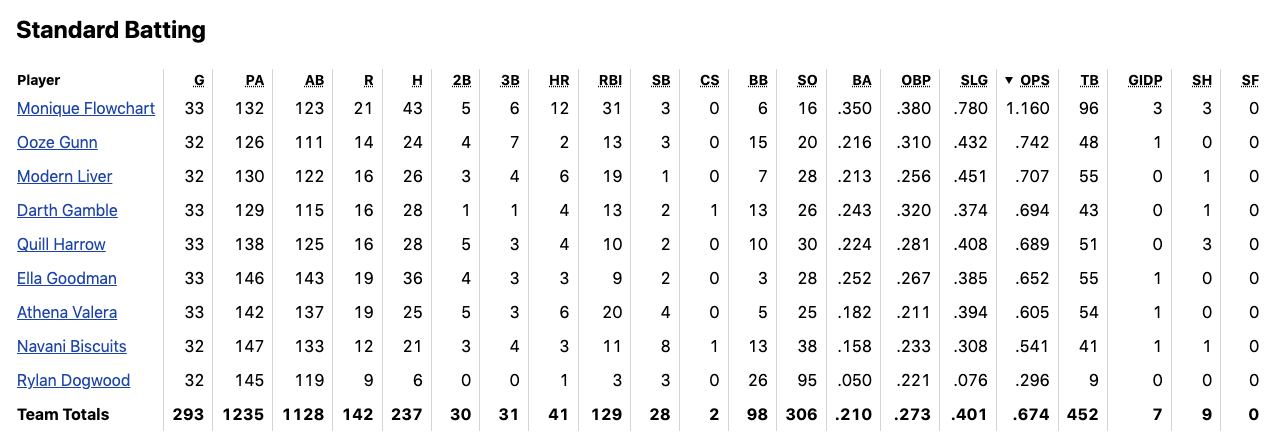

Through Day 54 (33 games in), here is our pitching:
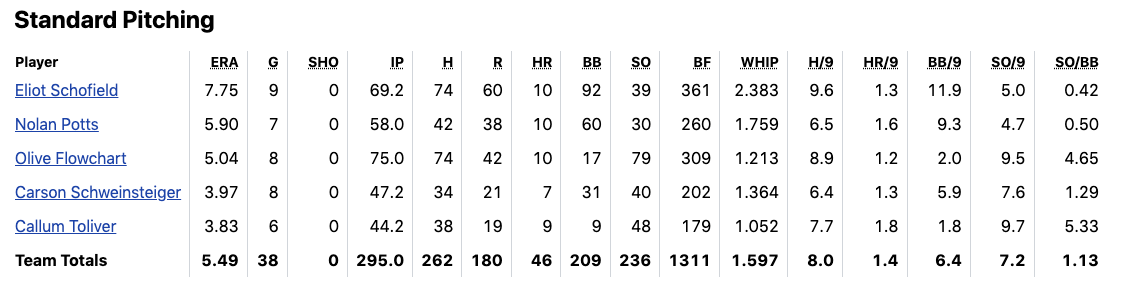
Wow, crabs bad!

---
## Appendix
* [Description of Attributes](https://www.blaseball.wiki/w/Player_Attributes)
* [Stlat Viewer](http://yoori.space/astrology/#baltimore-crabs-gamma9)
* [Historical Player Graphs](http://yoori.space/hloroscopes/)
* [Short Circuits Stats and Box Scores](https://bricks.sibr.dev/)